<a href="https://colab.research.google.com/github/Suddhaswatta/Missing-Data-Imputation/blob/main/Titanic_Missing_Explanatory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
from google.colab import files
import pandas as pd
import io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [15]:
df = pd.read_csv(io.StringIO(uploaded['titanic_train.csv'].decode('utf-8')))

In [16]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
df.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


###If the percentage of Missing Data is less than 5% then data is **Missing At Random**<br>
###If the percentage of Missing Data is greater than 5% then samples are **Not Missing At Random**


In [19]:
nmar = [var for var in df.columns if df[var].isnull().mean()*100>5]
nmar

['Age', 'Cabin']

###Above Case we can see columns Age , Cabin data are **Not Missing At Random**.<br>
###**Missing Data Not at Random** can be a sign that data of dead passengers could be missing

In [20]:
df[nmar+['Survived']].head()

,Age,Cabin,Survived
0,22.0,NaN,0
1,38.0,C85,1
2,26.0,NaN,1
3,35.0,C123,1
4,35.0,NaN,0


In [21]:
mar = [var for var in df.columns if df[var].isnull().mean()*100<5 and df[var].isnull().mean()*100>0]
mar

['Embarked']

###Above Case we can columns Embarked Missing At Random.<br>


#Conclusion :

###Age is Missing for 20% of the data so the data is Not Missing At Random

Suitable Options for Age since it is a numerical variable :

* Mean - Median Imputation with missing indicator (without missing indicator would have been okay if data was **Missing at Random**)
* Replacing missing value with constant value(Arbritary , End of Tail Imputation) 

###Cabin is Missing for 77% of the data so the data is Not Missing At Random

Suitable Options for Cabin since it is a categorical variable :

* Mode-Imputation(only valid for **Data Missing at Random**).
* Replacing missing value with constant value **"Missing"**

###Embarked is Missing for 0.22% of the data so the data is  Missing At Random

Suitable Options for Cabin since it is a categorical variable :

* Mode-Imputation.




In [22]:
df_missing = df[mar+nmar]

In [23]:
df_missing.head()

,Embarked,Age,Cabin
0,S,22.0,NaN
1,C,38.0,C85
2,S,26.0,NaN
3,S,35.0,C123
4,S,35.0,NaN


In [24]:
missing_num_var=[var for var in df_missing.columns if np.dtype(df[var])!='O']
missing_num_var

['Age']

In [25]:
missing_cat_var=[var for var in df_missing.columns if np.dtype(df[var])=='O']
missing_cat_var

['Embarked', 'Cabin']

###**Mean Median Imputations**

In [36]:
def meanMedianImputation(df,var,mode='median'):
  if mode == 'mean':
    return df[var].fillna(df[var].mean())
  else:
    return df[var].fillna(df[var].median())


In [37]:
df_missing['Age_mean']=meanMedianImputation(df_missing,'Age','mean')
df_missing

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [38]:
df_missing['Age_median']=meanMedianImputation(df_missing,'Age')
df_missing

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Embarked,Age,Cabin,Age_mean,Age_median
0,S,22.0,NaN,22.000000,22.0
1,C,38.0,C85,38.000000,38.0
2,S,26.0,NaN,26.000000,26.0
3,S,35.0,C123,35.000000,35.0
4,S,35.0,NaN,35.000000,35.0
...,...,...,...,...,...
886,S,27.0,NaN,27.000000,27.0
887,S,19.0,B42,19.000000,19.0
888,S,NaN,NaN,29.699118,28.0
889,C,26.0,C148,26.000000,26.0


In [42]:
df_missing.columns

Index(['Embarked', 'Age', 'Cabin', 'Age_mean', 'Age_median'], dtype='object')

In [45]:
df_missing_age = df_missing[['Age', 'Age_mean', 'Age_median']]

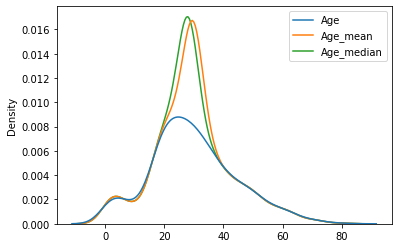

In [52]:
sns.kdeplot(data=df_missing_age)
plt.show()

###Introduces outliers 

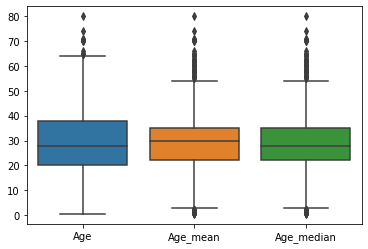

In [56]:
ax = sns.boxplot(data=df_missing_age)
plt.show()

###**End OF Tail Imputation(EOT)**

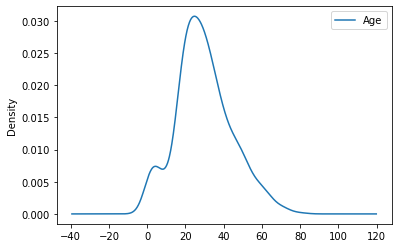

In [62]:
df[['Age']].plot.kde()
plt.show()

###Data is Normally distributed hence:
 * Age_imputed = Mean + 3 * Standard Deviation


In [64]:
def EndOfTail(df,var):
  return df[var].fillna(df[var].mean() + 3*df[var].std())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


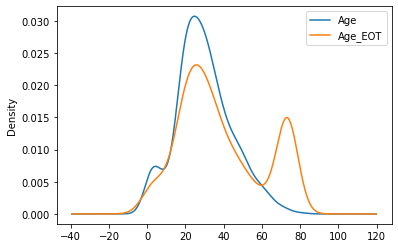

In [68]:
df_missing['Age_EOT']=EndOfTail(df_missing,'Age')
df_missing_age_eot = df_missing[['Age','Age_EOT']]
df_missing_age_eot.plot.kde()
plt.show()

###Masks Outliers 

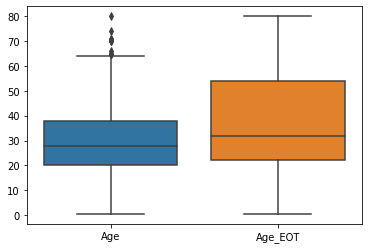

In [69]:
sns.boxplot(data=df_missing_age_eot)
plt.show()